In [1]:

import umap

import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import adjusted_rand_score as ARI
from sklearn.metrics import adjusted_mutual_info_score as AMI

from scipy import sparse
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (12,12)
import seaborn as sns
from scipy import sparse

sc.settings.verbosity =0


import harmonypy as hm
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc


In [ ]:
l1_colors = {
'ATL': '#1f77b4',
  'PT_VCAM1': '#c5b0d5',
 'CNT': '#ff7f0e',
 'DCT': '#279e68',
  'DCT1': '#279e68',
 'DCT2': '#ffb500',
 'DTL': '#d62728',
 'EC': '#aa40fc',
 'ENDO': '#aa40fc',
 'FIB': '#8c564b',
 'IC': '#e377c2',
 'ICA': '#e377c2',
 'ICB': '#7b4f4b',
 'IMM': '#b5bd61',
 'LEUK': '#b5bd61',
 'NEU': '#17becf',
 'PC': '#aec7e8',
 'PEC': '#17becf',
 'POD': '#98df8a',
 'PODO': '#98df8a',
'PT': '#ff9896',
 'PapE': '#c5b0d5',
 'TAL': '#c49c94',
'MES': '#f7b6d2',
 'VSM/P': '#f7b6d2','Unclassified':'#d3d3d3'}

In [ ]:
l3_colors = {
'ATL': '#ffff00',
 'B': '#1ce6ff',
 'C-TAL': '#ff34ff',
 'PC': '#aec7e8',
 'CCD-IC-A': '#ff4a46',
 'CCD-PC': '#008941',
 'CNT': '#006fa6',
 'CNT-IC-A': '#a30059',
 'CNT-PC': '#ffdbe5',
 'DCT1': '#7a4900',
 'DCT2': '#0000a6',
 'DTL': '#63ffac',
 'EC-AEA': '#b79762',
 'EC-AVR': '#004d43',
 'EC-DVR': '#8fb0ff',
 'EC-GC': '#997d87',
 'EC-LYM': '#5a0007',
 'EC-PTC': '#809693',
 'FIB': '#6a3a4c',
 'IC-B': '#1b4400',
 'IMCD': '#4fc601',
 'M-FIB': '#3b5dff',
 'M-TAL': '#4a3b53',
 'MAC-M2': '#ff2f80',
 'MAST': '#61615a',
 'MC': '#ba0900',
 'MD': '#6b7900',
 'MDC': '#00c2a0',
 'MYOF': '#ffaa92',
 'N': '#ff90c9',
 'NEU': '#b903aa',
 'NKC/T': '#d16100',
 'OMCD-IC-A': '#ddefff',
 'OMCD-PC': '#000035',
 'PEC': '#7b4f4b',
 'PL': '#a1c299',
 'POD': '#300018',
 'PT-S1/2': '#0aa6d8',
 'PT-S3': '#013349',
 'PapE': '#00846f',
 'REN': '#372101',
 'T': '#ffb500',
 'VSMC': '#c2ffed',
 'VSMC/P': '#a079bf',
 'aFIB': '#cc0744',
 'aPT': '#c0b9b2',
 'aTAL1': '#c2ff99',
 'aTAL2': '#001e09',
 'cDC': '#00489c',
 'cycCNT': '#6f0062',
 'cycDCT': '#0cbd66',
 'cycEC': '#eec3ff',
 'cycMNP': '#456d75',
 'cycMYOF': '#b77b68',
 'cycNKC/T': '#7a87a1',
 'cycPT': '#788d66',
 'dC-IC-A': '#885578',
 'dC-TAL': '#fad09f',
 'dCNT': '#ff8a9a',
 'dDCT': '#d157a0',
 'dEC': '#bec459',
 'dEC-PTC': '#456648',
 'dFIB': '#0086ed',
 'dIMCD': '#886f4c',
 'dM-FIB': '#34362d',
 'dM-TAL': '#b4a8bd',
 'dOMCD-PC': '#00a6aa',
 'dPT': '#452c2c',
 'dVSMC': '#636375',
 'ncMON': '#a3c8c9',
 'pDC': '#ff913f',
 'tPC-IC': '#938a81','Unclassified':'#d3d3d3'}

In [ ]:
techs_color = {'scRNA': '#1f77b4', 'scRNA5p': '#ff7f0e', 'snRNA': '#2ca02c'} 
techs_color_2 = {'10x scRNA(scCv3)': '#1f77b4', '10x scRNA 5p(scCv2)': '#ff7f0e', '10x Multiome': '#2ca02c'} 

tech_dict = {'10x Multiome':'snRNA', '10x scRNA 5p(scCv2)':'scRNA5p', '10x scRNA(scCv3)':'scRNA'}

sample_colors = {'lib_03': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 
 'lib_09': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274), 
 'lib_10': (1.0, 0.4980392156862745, 0.054901960784313725), 
 'lib_15': (1.0, 0.7333333333333333, 0.47058823529411764), 
 'lib_16': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), 
 'lib_19': (0.596078431372549, 0.8745098039215686, 0.5411764705882353), 
 'lib_20': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), 
 'lib_29': (1.0, 0.596078431372549, 0.5882352941176471), 
 'lib_34': (0.5803921568627451, 0.403921568627451, 0.7411764705882353), 
 'lib_36': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589), 
 'lib_38': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), 
 'lib_49': (0.7686274509803922, 0.611764705882353, 0.5803921568627451), 
 'lib_51': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), 
 'lib_55': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058), 
 'lib_56': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), 
 'lib_57': (0.7803921568627451, 0.7803921568627451, 0.7803921568627451), 
 'lib_68': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), 
 'lib_420': (0.8588235294117647, 0.8588235294117647, 0.5529411764705883)} 

In [ ]:
import sys
sys.path.append('../../utils')
from utils import umap_refined

In [2]:
save_key='RNA_STWG'

In [6]:
mod = save_key = 'RNA_STWG'

In [ ]:
adata = sc.read(f'objects/byTech/{mod}_final.h5ad')

In [14]:
ann_df = pd.read_csv('csv/clustering/AcrossTechs/Manual_Ann.csv')

/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: Us

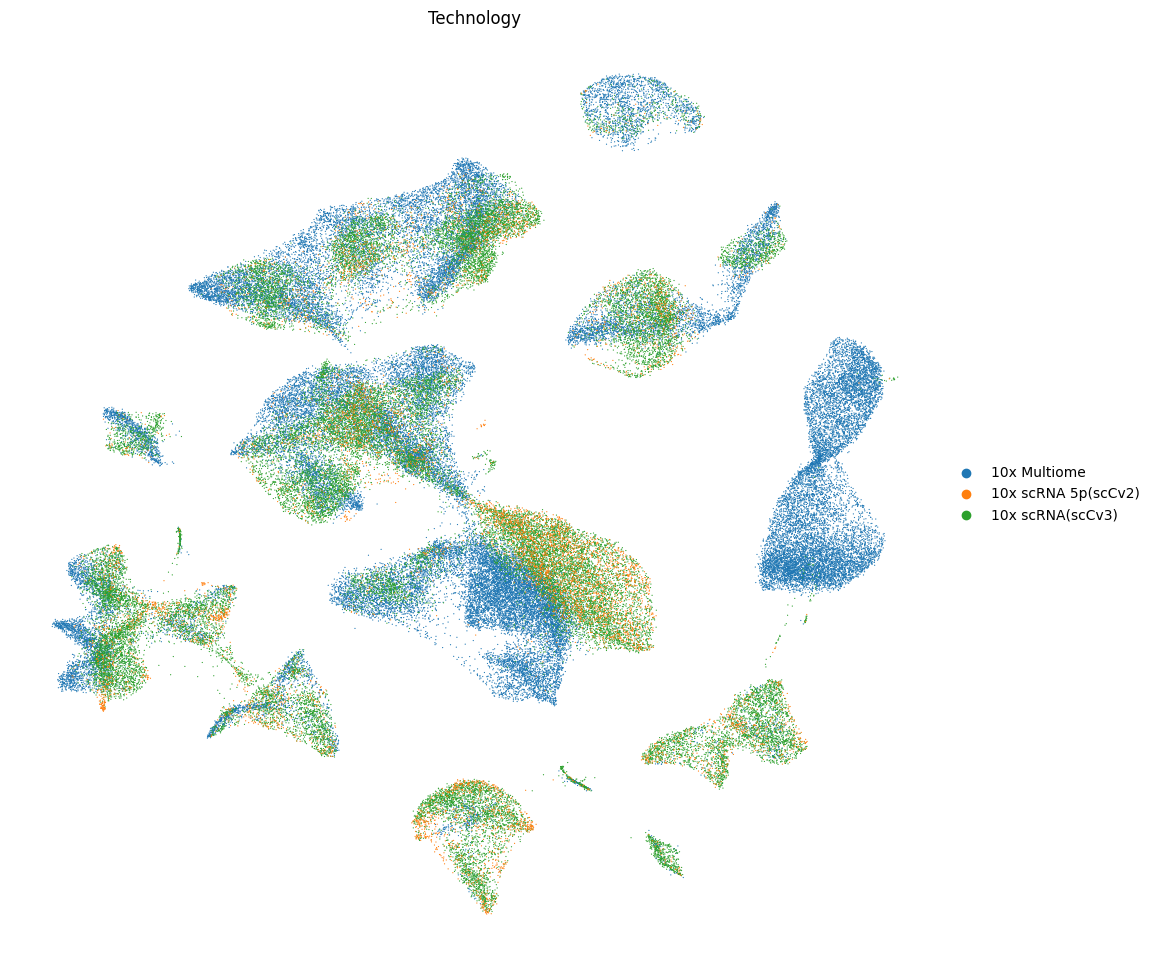

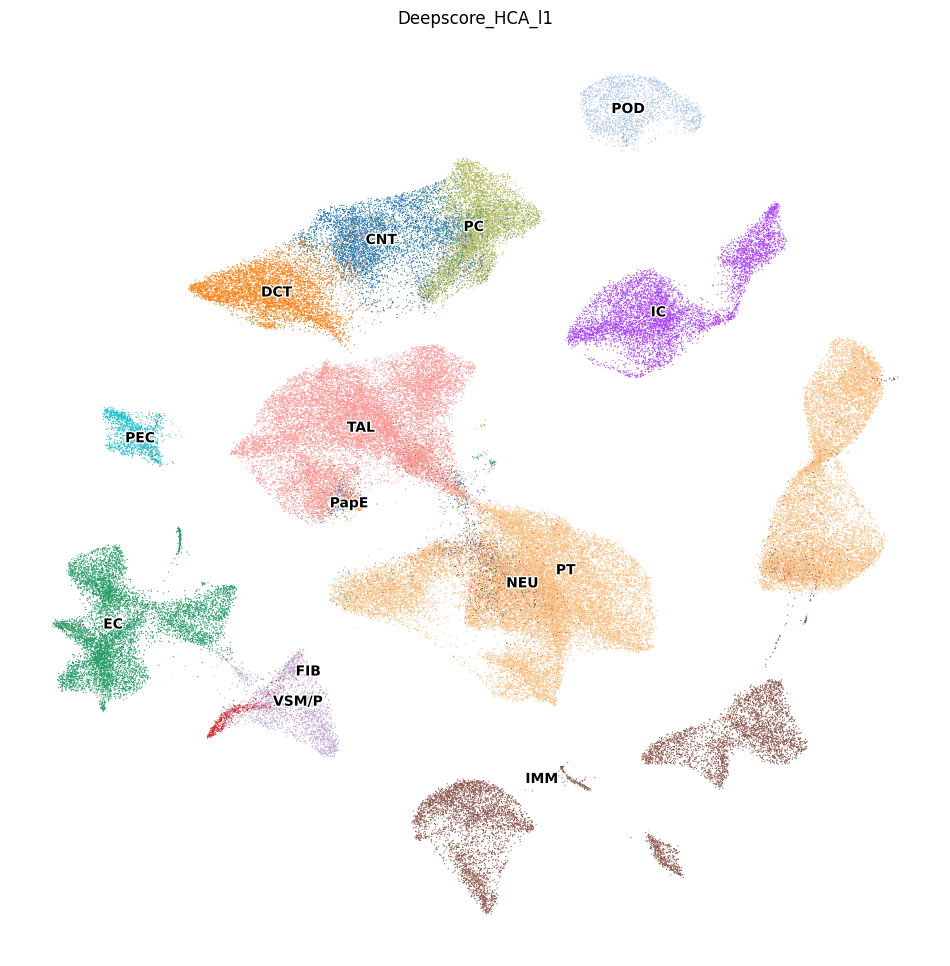

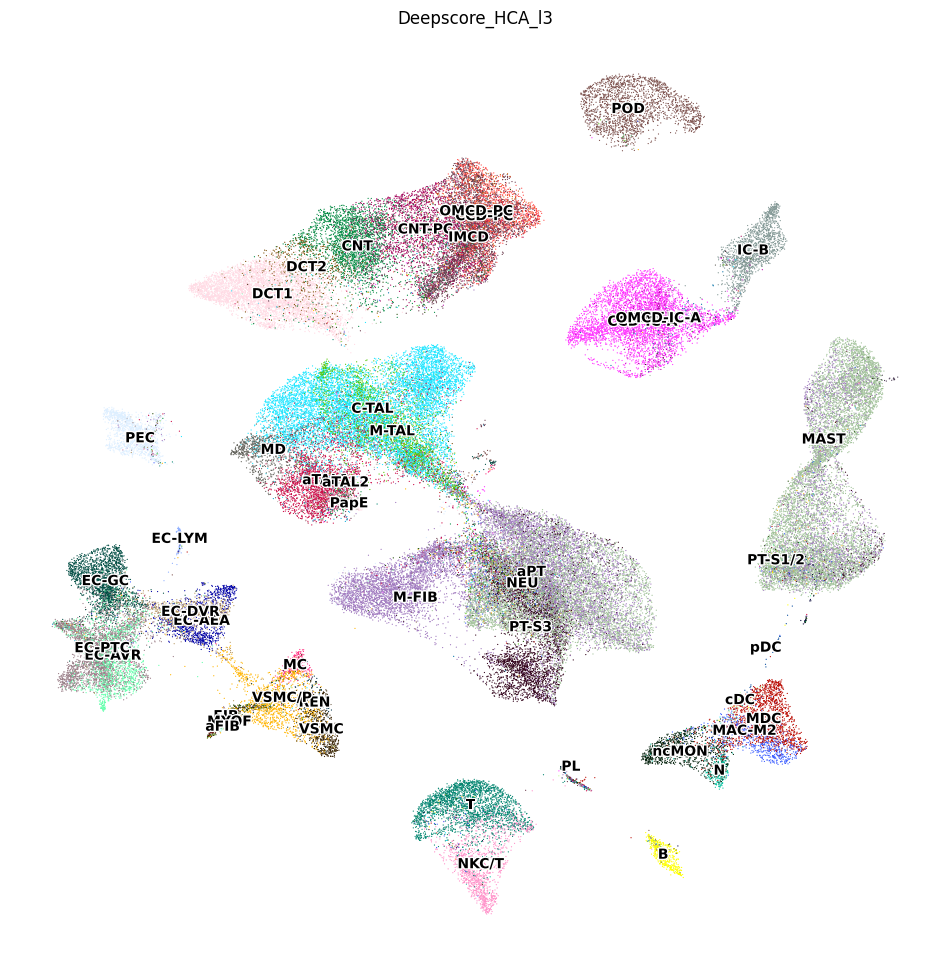

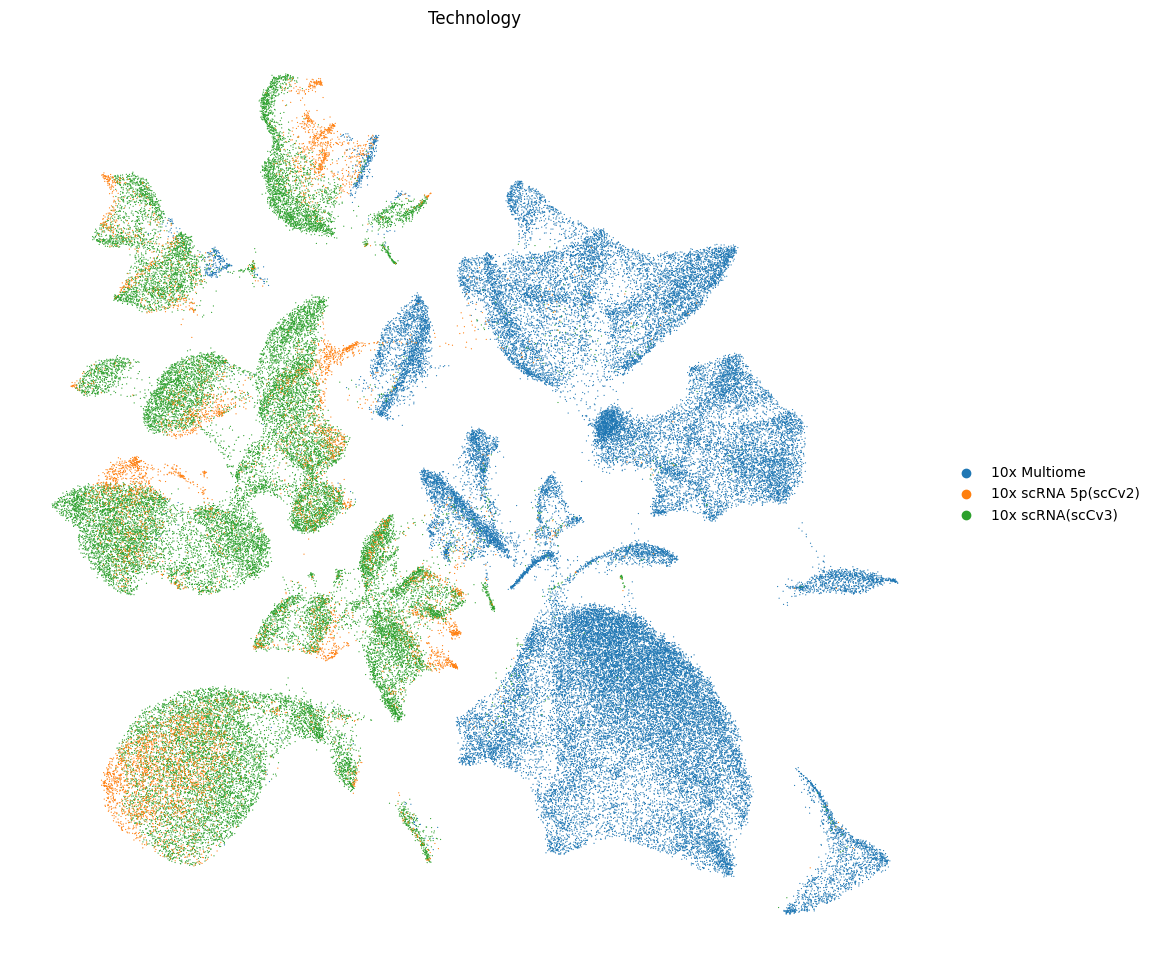

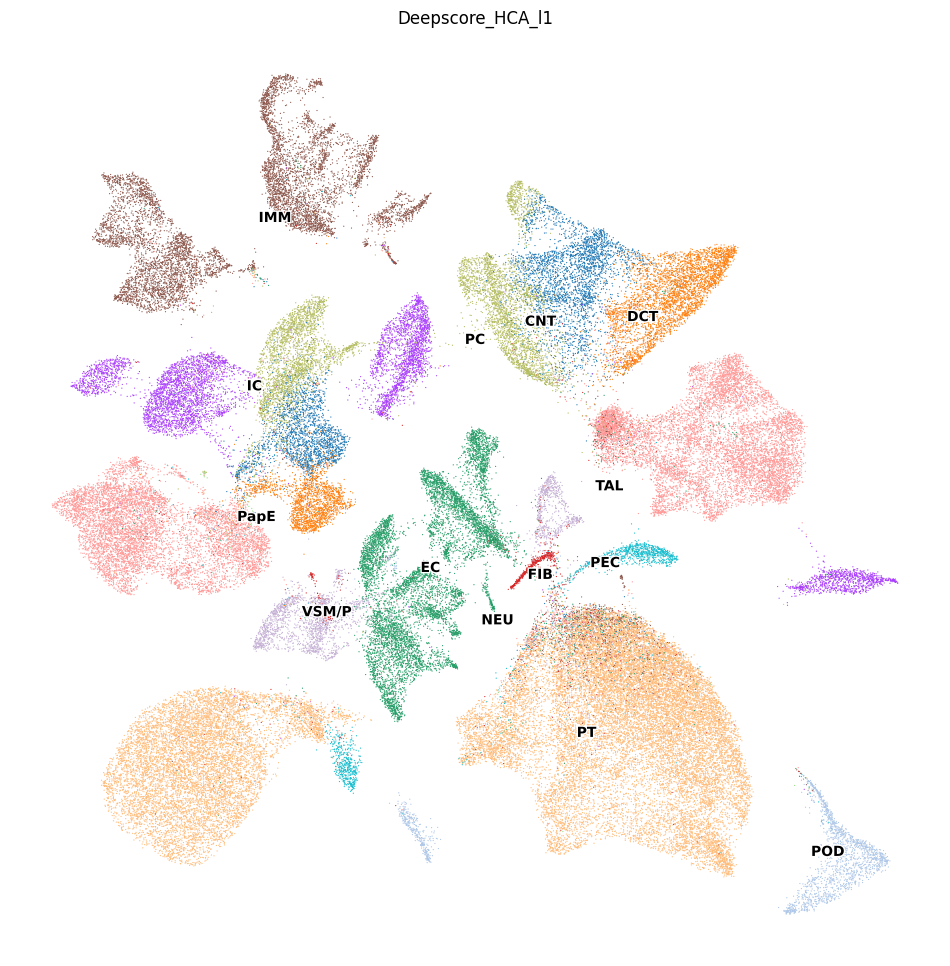

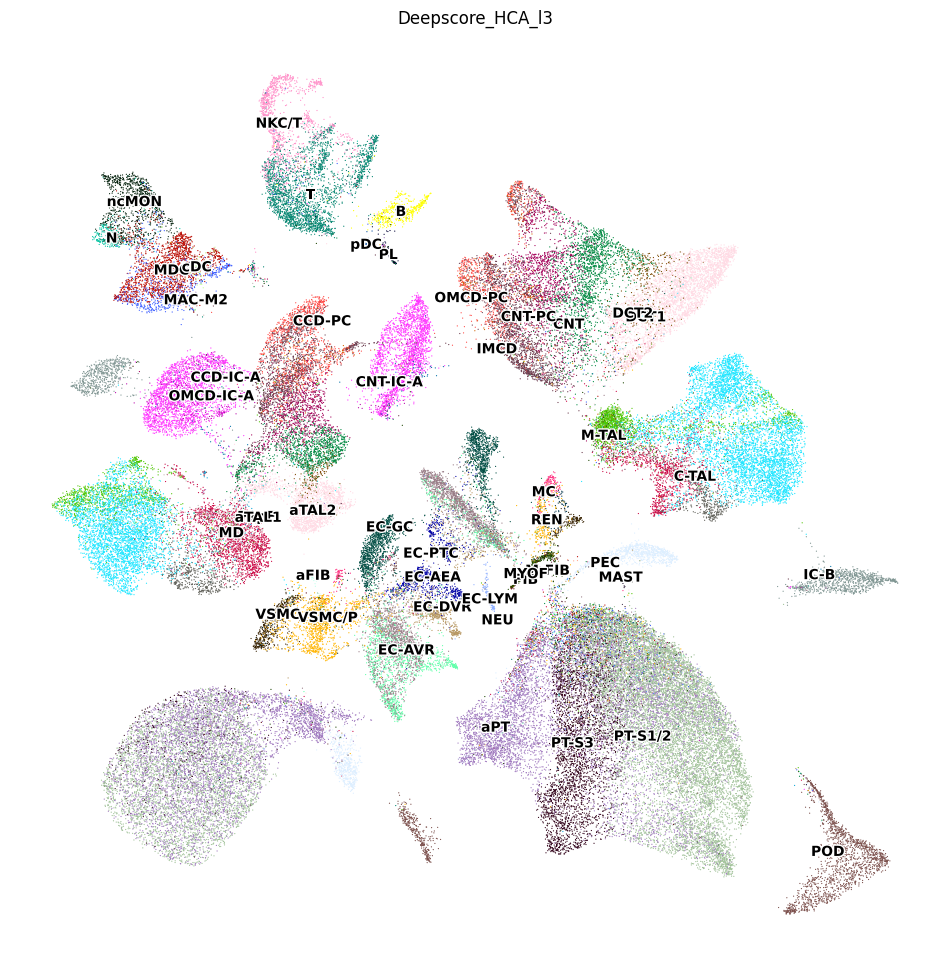

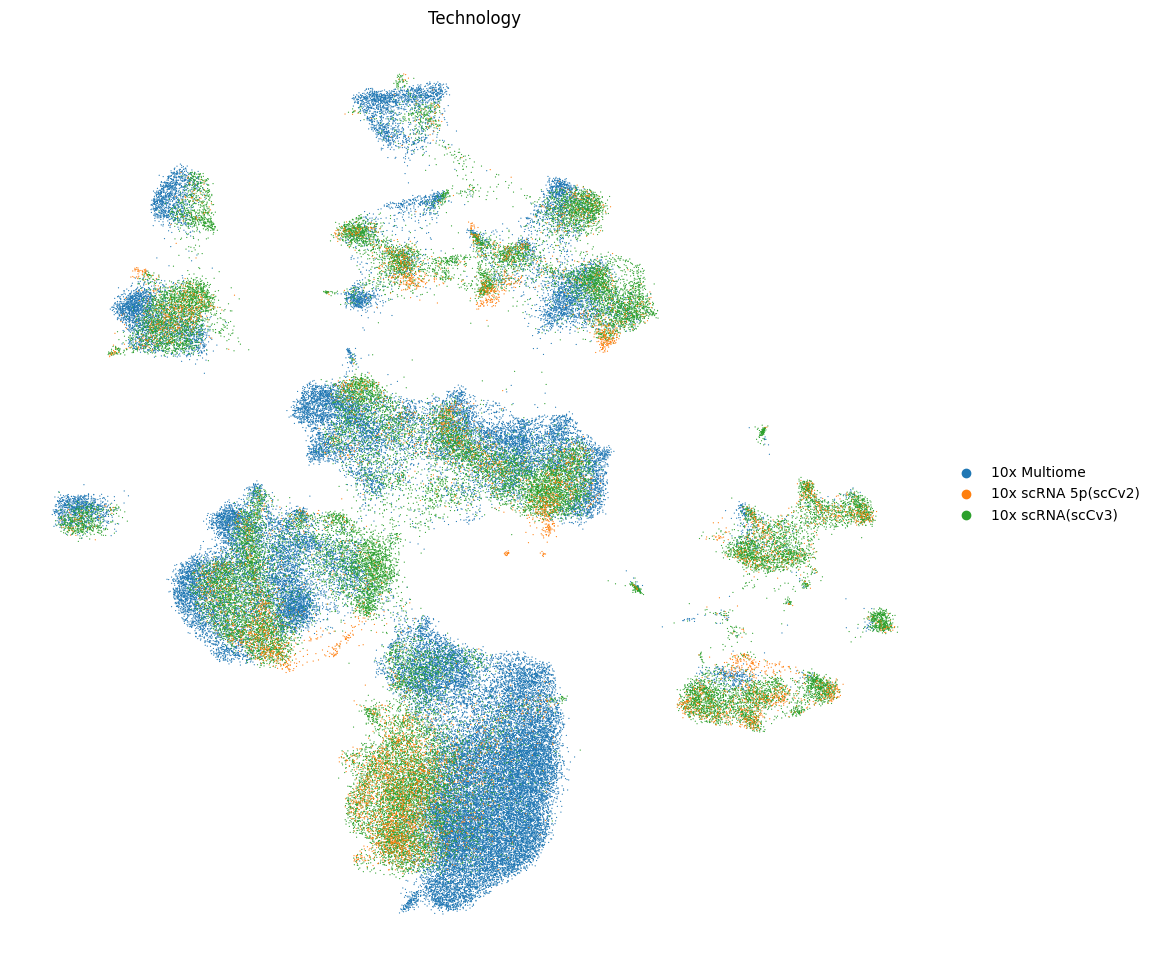

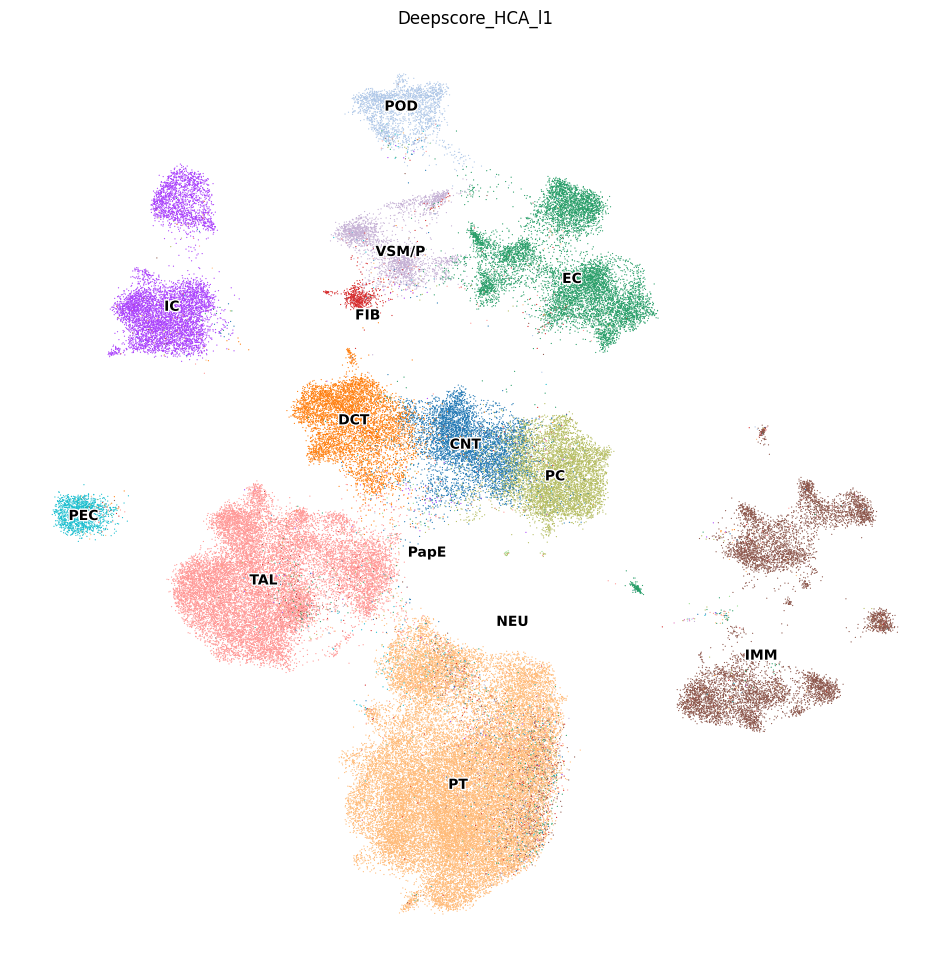

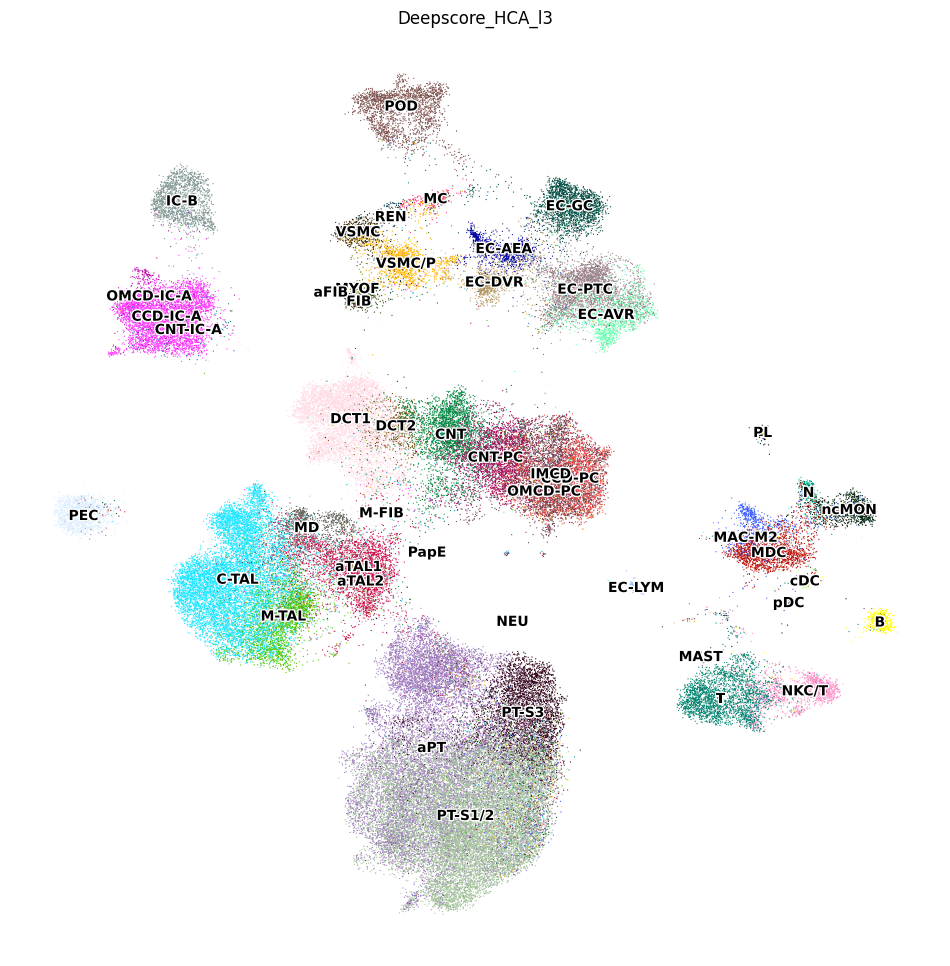

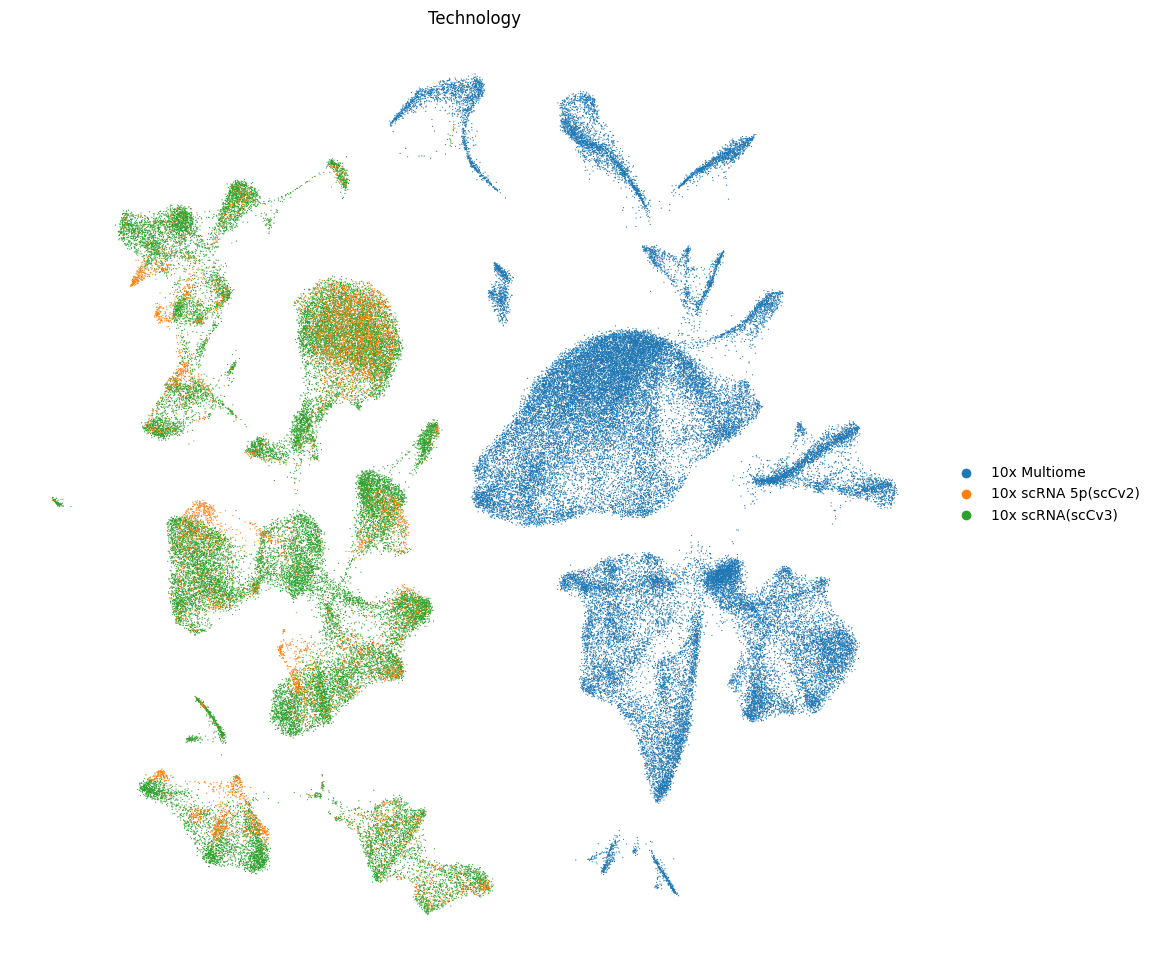

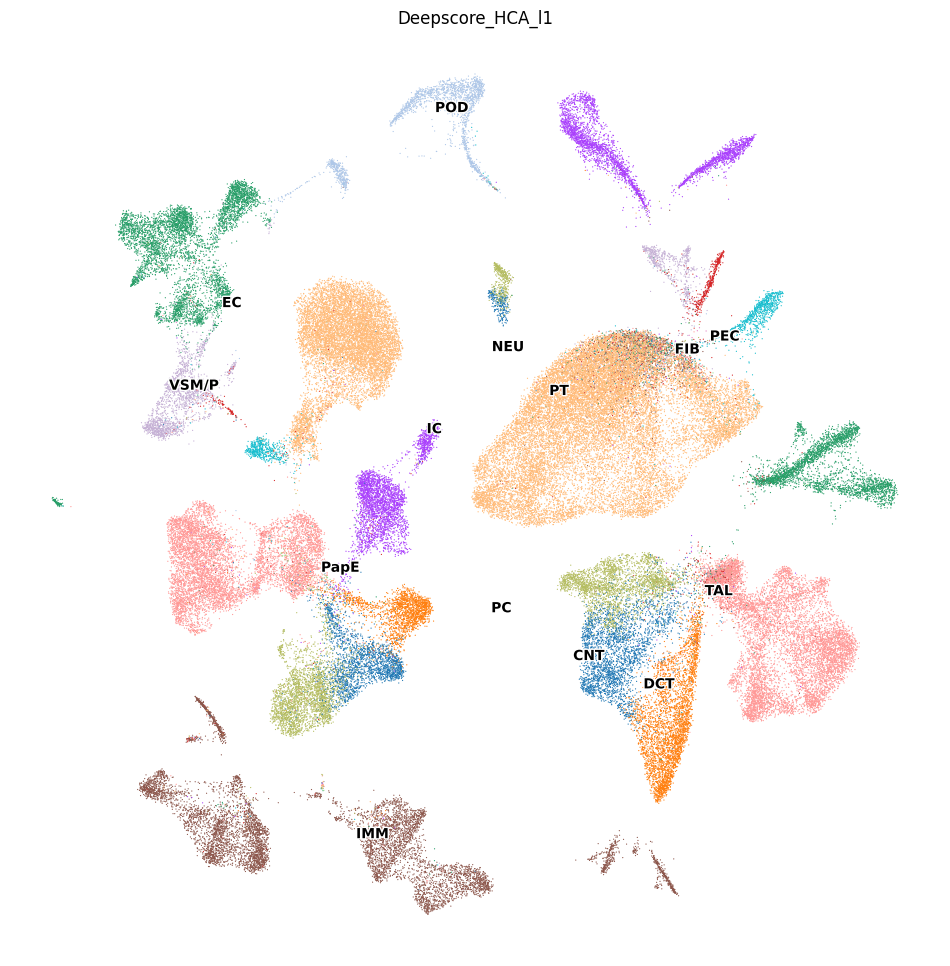

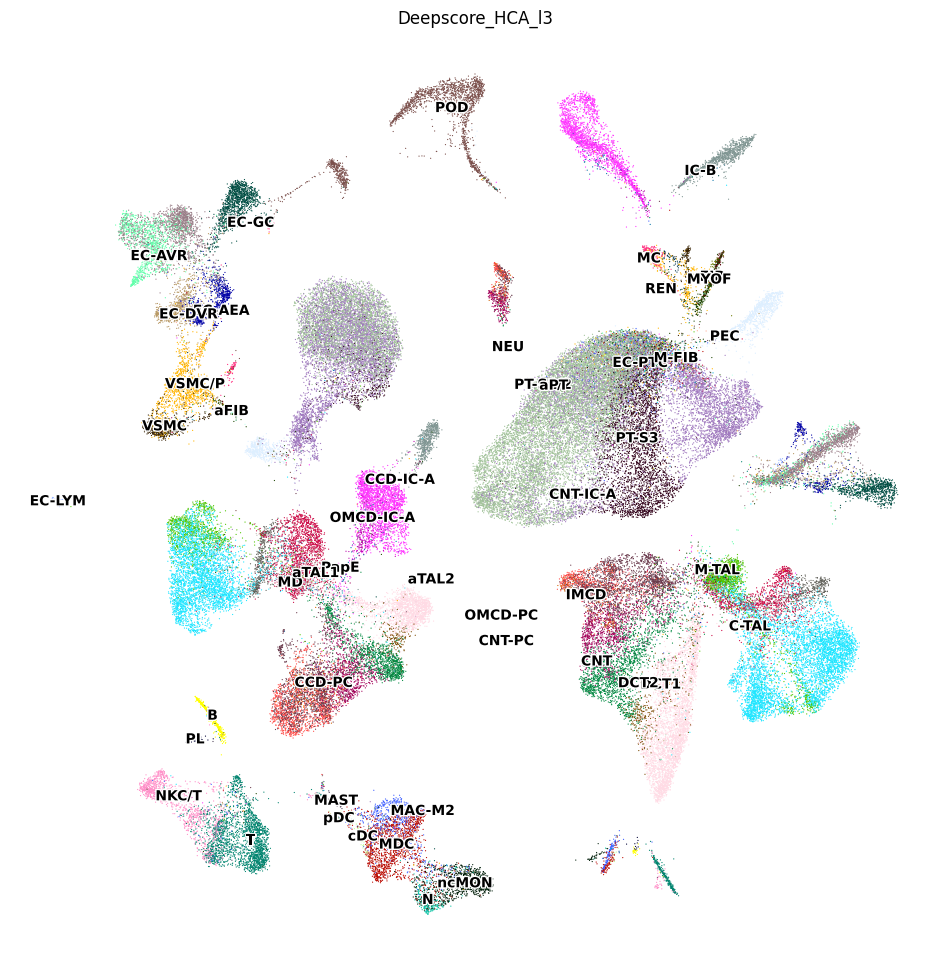

In [ ]:
fig_path = 'figures/AcrossTechs'
latents = ['Harmony','Unintegrated','scVI','Scanorama']
for i in latents:
    sc.pl.embedding(adata, basis = f'Umap_{i}', color = ['Technology'], frameon = False, size = 3, show=False, legend_fontoutline=2, legend_fontsize=10)
    plt.savefig(fig_path+f'/{i}_techs.png', dpi=200,bbox_inches='tight')
    sc.pl.embedding(adata, basis = f'Umap_{i}', color = ['Deepscore_HCA_l1'], frameon = False, size = 3, legend_loc='on data', show=False, legend_fontoutline=2)
    plt.savefig(fig_path+f'/{i}_Deepscore_HCA_l1.png', dpi=200,bbox_inches='tight')
    sc.pl.embedding(adata, basis = f'Umap_{i}', color = ['Deepscore_HCA_l3'], frameon = False, size = 3, legend_loc='on data', show=False,  legend_fontoutline=2)
    plt.savefig(fig_path+f'/{i}_Deepscore_HCA_l3.png', dpi=200,bbox_inches='tight')
